In [ ]:
import numpy
import cv2
from PIL import Image
from IPython.display import display
print("OpenCV-Python Version {}".format(cv2.__version__))

#base
name_M = "/content/drive/MyDrive/Colab Notebooks/lab first/macbeth_2592x1944_bpp14_RG.raw"
name_T = "/content/drive/MyDrive/Colab Notebooks/lab first/blc_2592x1944_bpp14_RG.raw"
w = 2592
h = 1944
imgSize = (h,w)
depth = numpy.uint16
colourMode = cv2.COLOR_BayerRGGB2RGB

#open
rawData_M = open(name_M, 'rb')
image_M = numpy.fromfile(rawData_M, depth, h*w).reshape(imgSize)
image_M <<= 2


#resorting colours
def splitBayer(arr):
    R  = arr[0::2, 0::2]
    Gr = arr[0::2, 1::2]
    Gb = arr[1::2, 0::2]
    B  = arr[1::2, 1::2]
    return numpy.dstack((R,Gr,Gb,B))

def combineBayer(stack):
    R = stack[...,0]
    height, width = R.shape
    bayer_im = numpy.zeros((height*2, width*2), dtype=R.dtype)
    bayer_im[0::2, 0::2] = R
    bayer_im[0::2, 1::2] = stack[...,1]
    bayer_im[1::2, 0::2] = stack[...,2]
    bayer_im[1::2, 1::2] = stack[...,3]
    return bayer_im

img_split_M = splitBayer(image_M)

#RGB done&show
img_c_M = cv2.cvtColor(combineBayer(img_split_M),colourMode)
display(Image.fromarray((img_c_M/256).astype(numpy.uint8)))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
rawData_T = open(name_T, 'rb')
image_T = numpy.fromfile(rawData_T, depth, h*w).reshape(imgSize)
image_T <<= 2

img_split_T = splitBayer(image_T)

img_c_T = cv2.cvtColor(combineBayer(img_split_T),colourMode)
#display(Image.fromarray((img_c_T/256).astype(numpy.uint8)))

#black channel
blacklevel = img_split_T.mean(axis=(0,1)).astype(depth)
img_without_blacklevel = combineBayer(img_split_M - blacklevel)
img_c_M_b = cv2.cvtColor(img_without_blacklevel,colourMode)
display(Image.fromarray((img_c_M_b/256).astype(numpy.uint8)))
blacklevel

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#base
name_l = "/content/drive/MyDrive/Colab Notebooks/lab first/lsc2_1920x1096_RG.raw"
w = 1096
h = 1920
imgSize = (h,w)
#depth = numpy.uint16
#colourMode = cv2.COLOR_BayerRGGB2RGB
range = 50


def readToArray(path, rows, cols, depth = numpy.uint16):
    with open(path, "rb") as f:
        return numpy.fromfile(f,depth,rows*cols).reshape((rows,cols))

def imshow(arr):
    """Только uint16"""
    display(Image.fromarray((arr/256).astype(numpy.uint8)))

#rawData_l = open(name_l, 'rb')
#image_l = numpy.fromfile(rawData_l, depth, h*w).reshape(imgSize)
#image_l <<= 2
#img_split_l = splitBayer(image_l)
#img_c_l = cv2.cvtColor(image_l,cv2.COLOR_BayerRGGB2RGB)
#display(Image.fromarray((img_c_l/256).astype(numpy.uint8)))

img_lsc2 = readToArray(name_l,1096,1920)
img_lsc2 <<= 2
imshow(cv2.cvtColor(img_lsc2, cv2.COLOR_BayerRGGB2RGB))

Output hidden; open in https://colab.research.google.com to view.

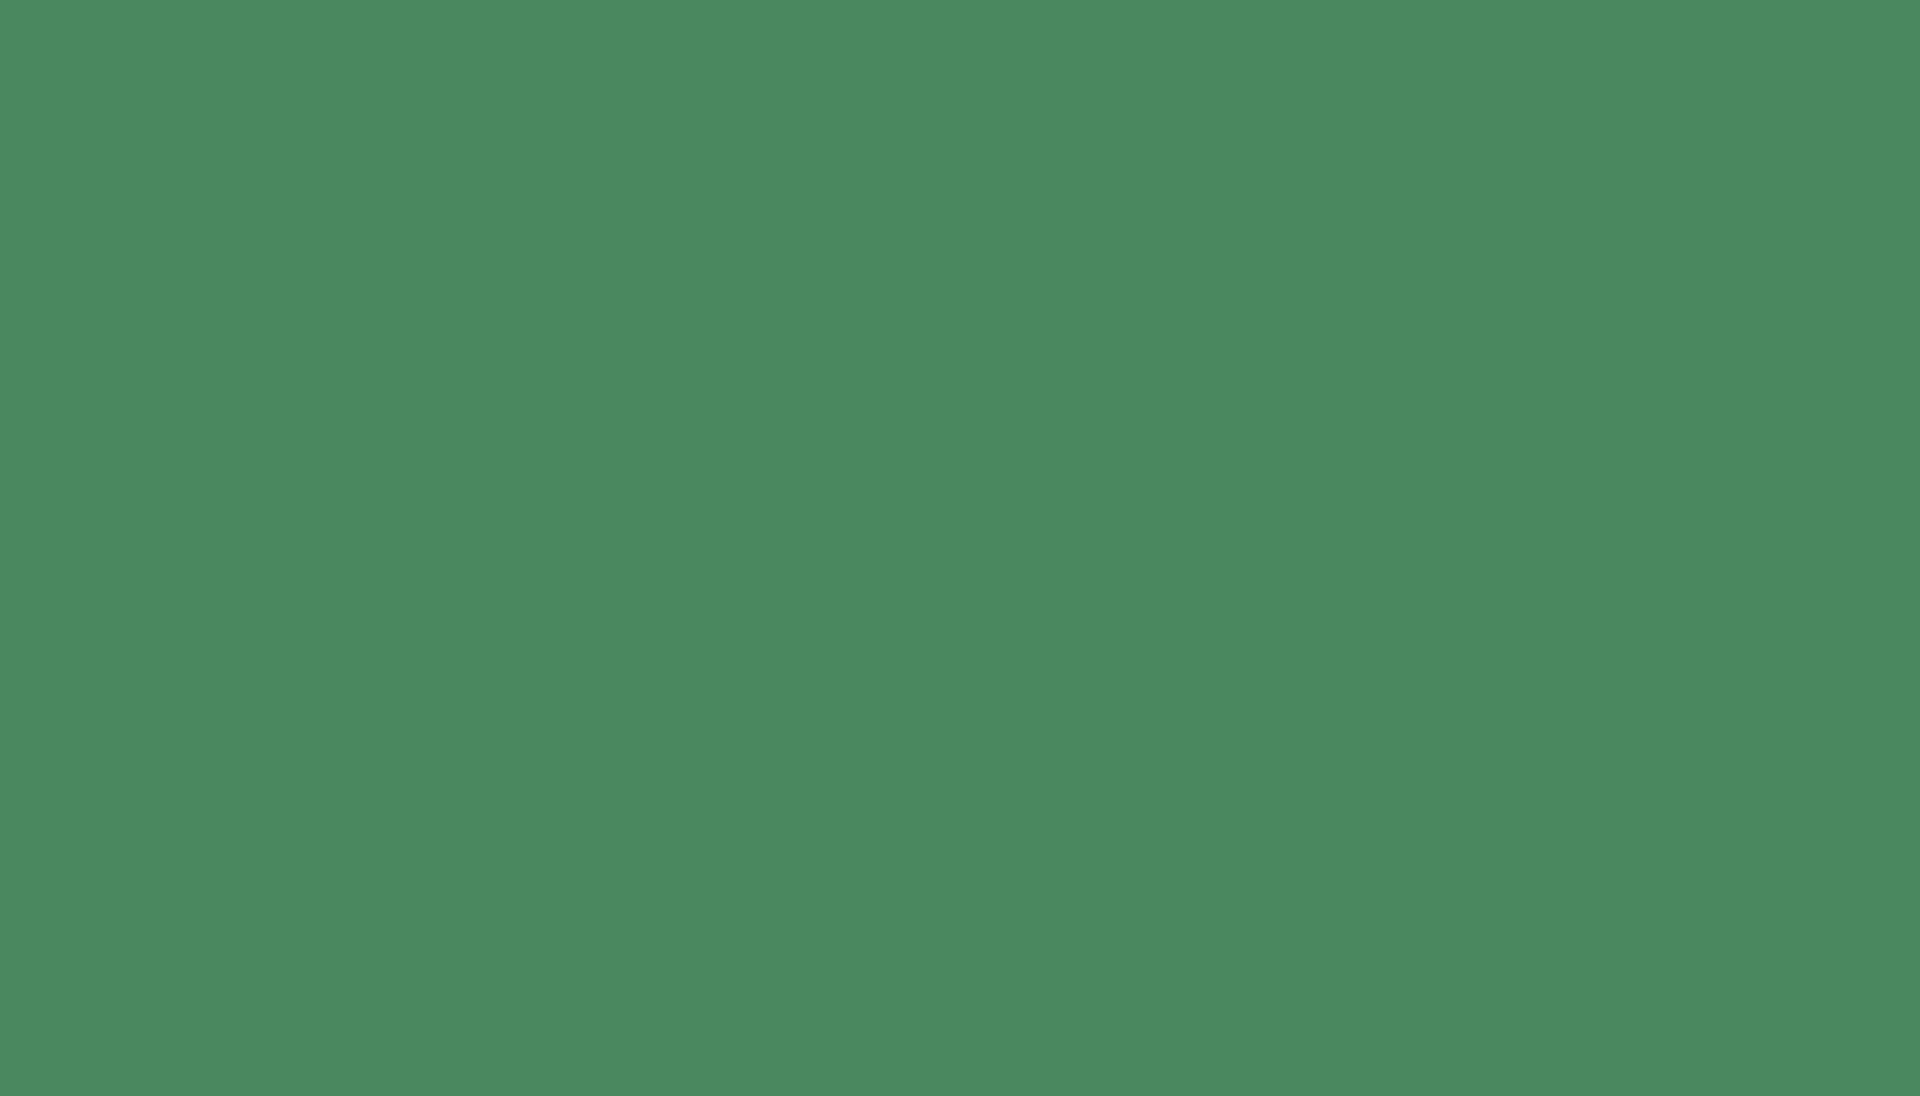

In [ ]:
img_lsc2_split = splitBayer(img_lsc2)
center_x, center_y  = numpy.array(img_lsc2_split[...,0].shape)//2
center_brightness = img_lsc2_split[center_x-range:center_x+range,center_y-range:center_y+range].mean(axis=(0,1)).astype(numpy.uint16)

center_brightness
gain = center_brightness/img_lsc2_split
imshow(cv2.cvtColor(combineBayer((img_lsc2_split*gain).astype(numpy.uint16)),cv2.COLOR_BayerRGGB2RGB))